In [147]:
import numpy as np
import pandas as pd
import geopandas as gpd
from pylusat import distance
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

In [13]:
acs2016_shp = "../pylusat/datasets/acs2016/acs2016.shp"
schools_shp = "../pylusat/datasets/schools/schools.shp"

In [14]:
acs2016_gdf = gpd.read_file(acs2016_shp)
schools_gdf = gpd.read_file(schools_shp)

In [16]:
acs2016_gdf['distschool'] = distance.to_point(acs2016_gdf, schools_gdf)

In [37]:
def label_color(labels, cmap):
    from matplotlib.pylab import cm
    from matplotlib.colors import rgb2hex
    cmap_colors = cm.get_cmap(cmap, len(labels))
    return dict(zip(
        labels, [rgb2hex(cmap_colors(i)[:3]) for i in range(len(labels))]
    ))

In [164]:
def plot_gdf(input_gdf, clm, bins, axis, cmap='Greens'):
    axis.set_aspect("equal")
    
    labels=[]
    for i in range(1, len(bins)):
        if i == len(bins)-1:
            labels.append(f"above {bins[i-1]}")
        else:
            labels.append(f"{bins[i-1]}-{bins[i]}")
    
    input_gdf['range'] = pd.cut(input_gdf[clm], bins=bins, 
                                include_lowest=True, labels=labels)
    input_dict = {label: input_gdf.loc[input_gdf['range'] == label] 
                  for label in labels}
    color_dict = label_color(labels, cmap)
    for key in input_dict.keys():
        input_dict[key].plot(color=color_dict[key], ax=axis, edgecolor='#6E6E6E',
                             linewidth=0.7, label=key, alpha=0.9)

    import matplotlib.patches as mpatches
    leg_handles = []
    for key, value in color_dict.items():
        leg_handles.append(mpatches.Patch(color=value, label=key, alpha=0.8))

    leg = axis.legend(loc=1, framealpha=1, title="point distance (meters)", 
                      title_fontsize=16, fontsize=16, handles=leg_handles)
    leg._legend_box.align = "left"
    
    axis.axis('off')
    
    import contextily as cx    
    cx.add_basemap(axis, url=cx.providers.OpenStreetMap.Mapnik, 
                    crs=input_gdf.crs.to_string(), reset_extent=True)
    
    return axis

D:\OneDrive - University of Florida\Research\PyLUSAT Project\pylusat\venv\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.


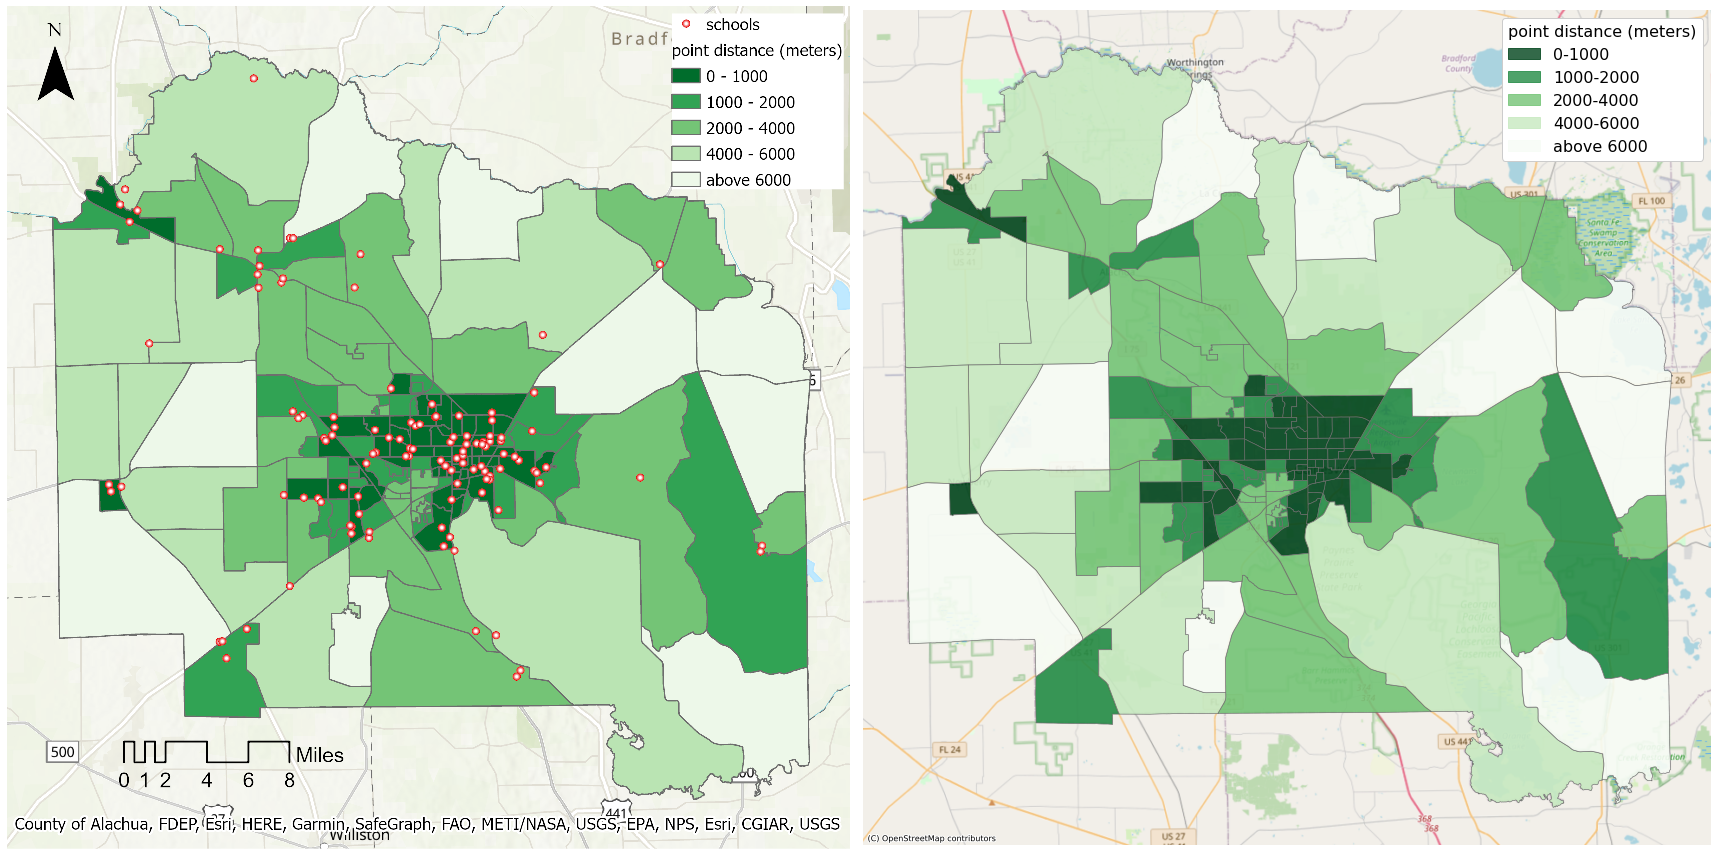

In [166]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))

import matplotlib.image as mpimg
img = mpimg.imread('arcgis_dist.png')
imgplot = axes[0].imshow(img)

axes[0].axis('off')
axes[1] = plot_gdf(acs2016_gdf, 'distschool', 
                   [0, 1000, 2000, 4000, 6000, np.inf], 
                   axes[1], cmap='Greens_r')

fig.tight_layout()
fig.savefig("pnt_dist_compare.png", dpi=300)